Implementation
Cross synthesis blends two audio signals by impressing the spectral envelope of one sound (the modulator) on the (optionally flattened) spectrum of another (the carrier). To do this, we completed the following steps. 

1. Take a Short-Time Fourier Transform (STFT) of the carrier and modulator signals
2. Extract the spectral envelope of the modulator using Linear Prediction Coefficients
3. Optionally flatten the carrier spectrum by dividing the spectrum by its spectral envelope.
4. Multiply the (flattened) carrier spectrum by the spectral envelope of the modulator. 
5. Take the Inverse Short-Time Fourier Transform (ISTFT) of the resulting spectrum. 

A more detailed breakdown is as follows:
Our program has variable window size, # of linear coefficients, and window function (none, bartlett, or hanning). It is optional to flatten the carrier spectrum but is recommended. 

STEP 1: STFT
To compute the STFT, we generate an array of frames with dimensions (L x N) where L is the window size and N is the number of frames. The signal is partitioned into N windows of length L separated by a specified hop size R. We refer to this as the windowed carrier/modulator. An FFT is performed at each time frame and we return the array of FFTs. 

STEP 2: Spectral Envelopes with LPC
We find the Linear Prediction Coefficients (LPCs) for each time frame of the windowed modulator. To generate LPCs, we compute M autocorrelate terms and an (M x M) toeplitz matrix where M is the number of coefficients we want to generate.
The autocorrelate terms are found with: [insert math formula] and the toeplitz matrix is a diagonal constant matrix. We solve the equation [insert better looking a_x * R_x = -r_x] by using a least squares solution to the linear matrix equation to find the coefficients. To get the spectral envelope of the signal's time frame, we take the reciprocal of the FFT of the absolute value of the coefficients. We do this for every time frame generating a matrix where each column is a spectral envelope for given time frame. 

The window functions we use:

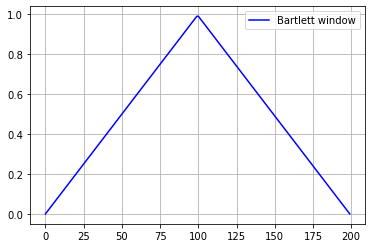

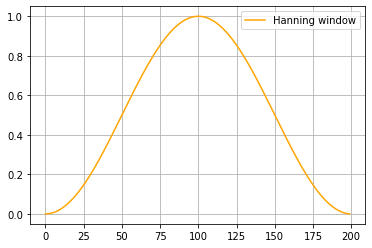

In [5]:
#==============Imports and Load Audio===============#
import numpy as np
import matplotlib.pyplot as plt
def get_bartlett(L):
    """ returns coefficients for bartlett/triangular window 
        of length L
        window should have 50% 
        (hop size R should be window size M / 2)"""
    half = 2* np.arange(L//2) / L
    return np.concatenate((half, np.flip(half)))
def get_hanning(L):
    """ returns coefficients for hanning window of length L"""
    return 0.5* (1-np.cos(2*np.pi*np.arange(L)/L))

plt.plot(get_bartlett(200), color='blue', label="Bartlett window")
plt.legend()
plt.grid()
plt.show()
plt.plot(get_hanning(200), color='orange', label="Hanning window")
plt.legend()
plt.grid()
plt.show()